### $$\text{Project 2}$$

$$\text{Predicting human behavior from smartphone sensors.}$$

$$\text{By EG Timerise}$$

$\text{The goal of this review is to conduct exploratory data analysis and to predict movement behavioral patterns from smart phone sensor data}$

$$\text{Lets first review the background information about the data set.}$$

$\text{Thirty volunteers combine make up the training and test set.}$

$$\text{The various target attributes are :}$$

$\text{0.) Walking}$

$\text{1.) Walking_upstairs}$

$\text{2.) Walking_downstars}$

$\text{3.) Sitting}$

$\text{4.) Standing}$

$\text{5.) Lying}$



$\text{* The measurements used from smartphone sensor signal readers (gyroscope and accelerometer).}$.

$\text{* 561 columns are for feature  time and frq variables, one label column, one total acceleration  and estimated body acceleration feature, also a triaxial angular velocity from the gyroscope feature.}$

$\text{ Data set has already been normalized between -1 and 1}$
$\text{* We are now interested in classfying 6 different outcomes correctly.}$

$\text{In the following report we will try the following predictive modeling methods, after data mining for good features:}$

$\text{1.) Multinomial Logistic Regression model}$


$\text{ Check out a video of part of the experiment, below! Wish there was sound.}$

$\text{It wasn't stated, but from the data set we can see that each test was done more than once, since they say they only used 30 people.}$


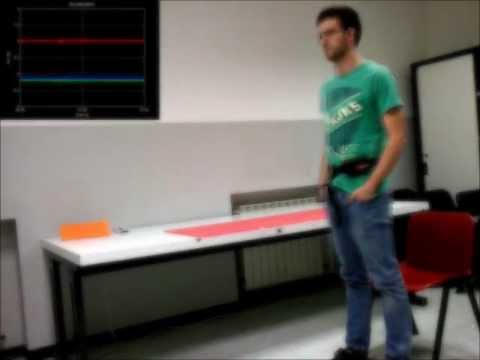

In [1]:
from IPython.display import Audio,Image,YouTubeVideo
id='XOEN9W05_4A'
YouTubeVideo(id=id,width=900,height=400)
## video source!! ::Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and Xavier Parra(2)
## 1 - Smartlab - Non-Linear Complex Systems Laboratory
## DITEN - Università degli Studi di Genova, Genoa (I-16145), Italy. 
## 2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
## Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), Spain
#activityrecognition '@' smartlab.ws

$\text{Lets check the data for any missing data. Then try some feature reduction methods.}$

In [2]:
import pandas as pd
import numpy as np

tnames=np.loadtxt(r"C:\Users\dragon\Desktop\features.txt",dtype=str)[:,1]
y_te=pd.DataFrame(np.loadtxt(r"C:\Users\dragon\Desktop\y_test.txt"),columns=['activity'])
x_te=pd.DataFrame(np.loadtxt(r"C:\Users\dragon\Desktop\x_test.txt"),columns=tnames)
y_tr=pd.DataFrame(np.loadtxt(r"C:\Users\dragon\Desktop\y_train.txt"),columns=['activity'])
x_tr=pd.DataFrame(np.loadtxt(r"C:\Users\dragon\Desktop\x_train.txt"),columns=tnames)

train_df=pd.concat([y_tr,x_tr],axis=1)
test_df=pd.concat([y_te,x_te],axis=1)
pd.set_option('mode.chained_assignment',None)


In [3]:
train_df.isnull().sum(axis=0).head()

activity             0
tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
tBodyAcc-std()-X     0
dtype: int64

In [4]:
test_df.isnull().sum(axis=0).head()

activity             0
tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
tBodyAcc-std()-X     0
dtype: int64

$\text{Thankfully there is no missing data. Lets apply the drop duplicated function.}$
$\text{Then lets relook at the data structure.}$

In [5]:
train_df=train_df.drop_duplicates()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Columns: 562 entries, activity to angle(Z,gravityMean)
dtypes: float64(562)
memory usage: 31.6 MB


$\text{Nothing has changed.}$
$\text{I think this data set is already well prepared for predictive analysis.}$
$\text{We will still check out some more of the structure.}$

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 562 entries, activity to angle(Z,gravityMean)
dtypes: float64(562)
memory usage: 12.6 MB


In [7]:
train_df.activity.unique()

array([5., 4., 6., 1., 3., 2.])

In [8]:
test_df.activity.unique()

array([5., 4., 6., 1., 3., 2.])

$\text{So far everything looks good structure wise.}$

$\text{Lets split the training set into a 10% vaildation set and a 90% train set.}$

$\text{We can then dive deeper into the data set to figure out best predictors for modeling.}$

In [9]:
from sklearn import preprocessing
lab=preprocessing.LabelEncoder()
train_df.activity=pd.DataFrame(lab.fit_transform(train_df.activity),columns=['activity'])
test_df.activity=pd.DataFrame(lab.transform(test_df.activity),columns=['activity'])
y_response=train_df.activity.copy(deep=False)
train_df.drop('activity',axis=1,inplace=True)

$\text{Lets go with a  80% training and 20% vaildation set.}$

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_vaild,y_train,y_vaild=train_test_split(train_df,y_response,test_size=0.2,random_state=56,stratify=y_response)


$\text{We already know that the data has been normaizled and clean from the experiment testers.}$

$\text{From the video , we already know that most likely high values from the base represent movement.}$

$\text{Also , from the video it looks like we could reduce the predictors down to maybe three  set of predictors.}$

$\text{As I inferred from the video, from the data set we can see that we are looking at three diemsons x, y,z}$

$\text{The data set consist of mostly x y z information along with a few other variables.}$

$\text{So we really want to reduce the dimesions to only a few x y z values that give strong predictors}$

$\text{To attempt this, we will use a random forest to find out which variables broke the data apart best.}$

$\text{Most likely there are a lot of correlated variables, so we will then pick one or two sets that we like.}$

$\text{Then we will run simple mulitnomial logistic regression model.}$

In [11]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(max_depth=4,n_estimators=20,random_state=56,criterion='gini')
ranfor.fit(x_train,y_train)
trees=pd.DataFrame((ranfor.feature_importances_).reshape(1,561),columns=x_train.columns)
print('List of important features base off of forest:')
tree=trees.loc[:,(trees >0.02).any(axis=0)]
tree.T

List of important features base off of forest:


,0
tGravityAcc-max()-X,0.032898
tGravityAcc-min()-X,0.051318
tGravityAcc-energy()-X,0.040292
tGravityAcc-energy()-Y,0.043132
tBodyAccJerk-std()-X,0.030985
fBodyAcc-energy()-X,0.021622
fBodyAccJerk-mean()-X,0.031881
fBodyAccJerk-entropy()-X,0.032615
"angle(X,gravityMean)",0.040826


In [12]:
tree.shape

(1, 9)

$\text{So, base off the random forest method, we found 38 variables that showed ok importances in the trees.}$

$\text{Lets transform our data set to only house these variables, then run a correlation plot on them.}$

$\text{From there we can review so eda then conduct a few simple multinormal logistic regression model.}$

In [13]:
x_trains=x_train[tree.columns]
x_vailds=x_vaild[tree.columns]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
def heatmap_run(dat_corr,fig1,fig2,ctcolor):
    %matplotlib inline 
    %config InlineBackend.figure_format='svg'
    _=plt.figure(figsize=(fig1,fig2))
    _=sns.heatmap(dat_corr,linewidths=.5 ,annot=True,cmap=ctcolor)
    _=plt.title('correlation plot')
    
    return plt.show()

In [15]:
x_trains.columns=['tGravityAcc-max()-X', 'tGravityAcc-min()-X', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X', 'fBodyAcc-energy()-X',
       'fBodyAccJerk-mean()-X', 'fBodyAccJerk-entropy()-X',
       'angle(X,gravityMean)']
x_vailds.columns=['tGravityAcc-max()-X', 'tGravityAcc-min()-X', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X', 'fBodyAcc-energy()-X',
       'fBodyAccJerk-mean()-X', 'fBodyAccJerk-entropy()-X',
       'angle(X,gravityMean)']

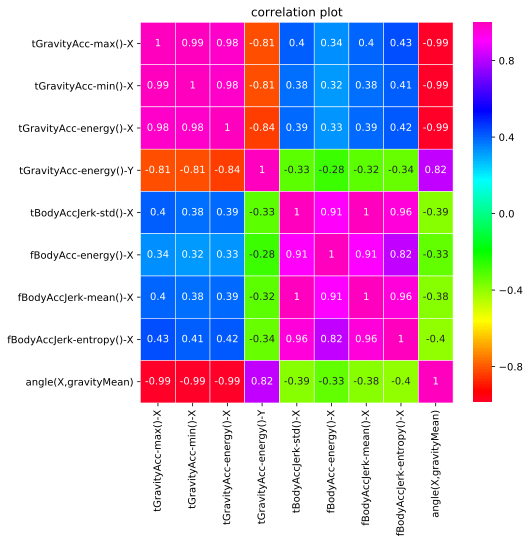

In [16]:
show=heatmap_run(x_trains.corr(),7,7,'gist_rainbow')
show

$\text{As expected, a few of the predictors are highly correlated with each other.}$

$\text{Lets reduce our predictors, then look at the correlation heat map again.}$

$\text{Looks like the data set had duplicate name columns,although each one is slightly different.}$

In [17]:
#x_trainss=pd.concat([x_trains['fBodyAccJerk-bandsEnergy()-3'],x_trains['angle(X,gravityMean)'],x_trains['fBodyGyro-maxInds-X'],x_trains['tGravityAcc-arCoeff()-Z,3']],axis=1)
#x_vaildss=pd.concat([x_vailds['fBodyAccJerk-bandsEnergy()-3'],x_vailds['angle(X,gravityMean)'],x_vailds['fBodyGyro-maxInds-X'],x_vailds['tGravityAcc-arCoeff()-Z,3']],axis=1)

x_trainss=pd.concat([x_trains['fBodyAcc-energy()-X'],x_trains['angle(X,gravityMean)']],axis=1)
x_vaildss=pd.concat([x_vailds['fBodyAcc-energy()-X'],x_vailds['angle(X,gravityMean)']],axis=1)


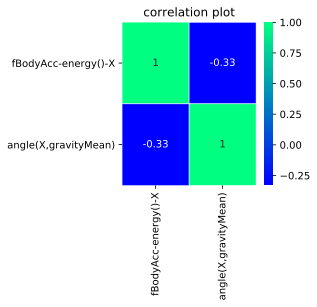

In [18]:
show=heatmap_run(x_trainss.corr(),3,3,'winter')
show

$\text{As previously expected from the video, three predictors is most likely all we needed.}$

$\text{Although , I initially thought the three predictors would be one from each x,y,z axis. }$

$\text{Lets check out our predictors via a model.}$

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## had to increase allowed number iterations taken for solvers to converge
mulogic=LogisticRegression(penalty='l2',multi_class='multinomial',solver='newton-cg')


In [20]:
mulogic.fit(x_trainss,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import roc_curve

def vaildmodel_reviews(fitter):
    %matplotlib inline 
    %config InlineBackend.figure_format='svg'
    ##  make prediction on the vaidation response with the vaidlation predictor set 
    y_pred1=mulogic.predict(x_vaildss)
    
    print('Computing the confusion_matrix for the fitted train model on vaildation set.\n')
    _=sns.heatmap(confusion_matrix(y_vaild,y_pred1),linewidths=.5,annot=True,cmap="GnBu_r")
    plt.xticks(np.arange(5))
    plt.yticks(np.arange(5))
    plt.ylabel('Real label')
    plt.xlabel('predicted label')
    plt.show()
    print('\nClassification Report for prediction on y_vaild\n')
    print(classification_report(y_vaild,y_pred1))
   

    return ;

    
    

Computing the confusion_matrix for the fitted train model on vaildation set.



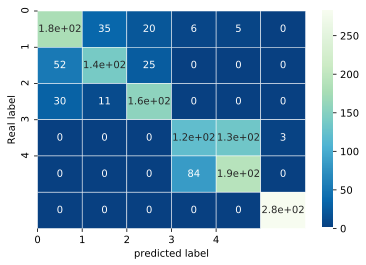


Classification Report for prediction on y_vaild

             precision    recall  f1-score   support

          0       0.69      0.73      0.71       245
          1       0.75      0.64      0.69       215
          2       0.78      0.79      0.78       197
          3       0.57      0.47      0.52       257
          4       0.58      0.69      0.63       275
          5       0.99      1.00      0.99       282

avg / total       0.73      0.73      0.72      1471



In [22]:
vaildmodel_reviews(mulogic)

$\text{From the confusion matrix , we can see a not so good  diagonal matrix.}$

$\text{The confusion matrix is true response vs. predicted response.}$

$\text{So , we know our model was okay  at predicting the various classes.}$

$\text{Looking at the classification report , we see that the precision and recall rate are generally good.}$
